<a href="https://colab.research.google.com/github/carlibeisel/mason_water_budget/blob/main/reach_drainflow_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

By Carli Beisel

Created on August 20, 2024

Purpose: Superimpose all Mason Creek gauge readings to determine lag & response time of drain.

## Compile streamflow data for all reaches

In [1]:
## --------------- ##
## IMPORT PACKAGES ##
## --------------- ##

import pandas as pd
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
## ------------------------ ##
##  Major Reach Flow Files  ##
## ------------------------ ##
# main flow for each reach delineation (Qin/Qout)

solomon_highline = pd.read_csv('/content/drive/MyDrive/Data/Mason Water Budget/data_input/drainflow/wd63_drains_data/Solomon-drain-at-highline.csv')

solomon_marble = pd.read_csv('/content/drive/MyDrive/Data/Mason Water Budget/data_input/drainflow/wd63_drains_data/Solomon-Drain-at-marble-front.csv')

purdum_sweetwater = pd.read_csv('/content/drive/MyDrive/Data/Mason Water Budget/data_input/drainflow/wd63_drains_data/Purdum-at-Sweetwater.csv')

purdum_phyllis = pd.read_csv('/content/drive/MyDrive/Data/Mason Water Budget/data_input/drainflow/wd63_drains_data/Purdum-at-the-Phyllis.csv')

mason_phyllis = pd.read_csv('/content/drive/MyDrive/Data/Mason Water Budget/data_input/drainflow/wd63_drains_data/Mason-Creek-at-Madison.csv')

mason_marble = pd.read_csv('/content/drive/MyDrive/Data/Mason Water Budget/data_input/drainflow/wd63_drains_data/Mason-Creek-at-Ustick-and-Northside.csv')

mason_madison = pd.read_csv('/content/drive/MyDrive/Data/Mason Water Budget/data_input/drainflow/wd63_drains_data/Mason-Creek-Marble-front-Rd.csv')

mason_northside = pd.read_csv('/content/drive/MyDrive/Data/Mason Water Budget/data_input/drainflow/wd63_drains_data/Mason-Creek-at-Phyllis.csv')

mason_usgs = pd.read_csv('/content/drive/MyDrive/Data/Mason Water Budget/data_input/drainflow/wd63_drains_data/mason_usgs.csv')
mason_usgs.rename(columns={
    'X_00060_00003': 'Flow',
    'Date': 'Time'
}, inplace=True)

In [3]:
## ------------------------ ##
##  Minor Reach Flow Files    ##
## ------------------------ ##
# minor flow for each reach delineation (feeders,laterals,etc.)

spill_100 = pd.read_csv('/content/drive/MyDrive/Data/Mason Water Budget/data_input/drainflow/wd63_drains_data/100-Spill.csv')

east13_3_spill = pd.read_csv('/content/drive/MyDrive/Data/Mason Water Budget/data_input/drainflow/wd63_drains_data/13-3-East-Spill.csv')

spill_200 = pd.read_csv('/content/drive/MyDrive/Data/Mason Water Budget/data_input/drainflow/wd63_drains_data/200-Spill.csv')

spill_400 = pd.read_csv('/content/drive/MyDrive/Data/Mason Water Budget/data_input/drainflow/wd63_drains_data/400-spill.csv')

spill_500 = pd.read_csv('/content/drive/MyDrive/Data/Mason Water Budget/data_input/drainflow/wd63_drains_data/500-spill.csv')

spill_8_26 = pd.read_csv('/content/drive/MyDrive/Data/Mason Water Budget/data_input/drainflow/wd63_drains_data/8-26-Spill.csv')

bicandi = pd.read_csv('/content/drive/MyDrive/Data/Mason Water Budget/data_input/drainflow/wd63_drains_data/Bicandi.csv')

mason_highline_spill = pd.read_csv('/content/drive/MyDrive/Data/Mason Water Budget/data_input/drainflow/wd63_drains_data/Highline-spill-into-Mason.csv')

mason_feeder = pd.read_csv('/content/drive/MyDrive/Data/Mason Water Budget/data_input/drainflow/wd63_drains_data/Mason-Feeder.csv')

noble = pd.read_csv('/content/drive/MyDrive/Data/Mason Water Budget/data_input/drainflow/wd63_drains_data/Noble-Drain.csv')

mcdc = pd.read_csv('/content/drive/MyDrive/Data/Mason Water Budget/data_input/drainflow/wd63_drains_data/mason-Creek-Ditch-Company.csv')

In [ ]:
# Function to create a new DataFrame with daily averages
def create_gauge_df(df, gauge_name, time_column='timestamp', flow_column='flow'):
    df[time_column] = pd.to_datetime(df[time_column])
    df.set_index(time_column, inplace=True)
    df_daily = df.resample('D').mean()  # Resample by day and calculate the mean
    df_daily.reset_index(inplace=True)
    df_daily['Gauge'] = gauge_name
    df_daily = df_daily[['Gauge', time_column, flow_column]]
    df_daily.columns = ['Gauge', 'Date', 'Flow']  # Rename columns
    return df_daily

# create a DataFrame for each gauge in Mason Drain
phyllis_df = create_gauge_df(mason_phyllis, 'Mason at Phyllis')
marble_df = create_gauge_df(mason_marble, 'Mason at Marble')
madison_df = create_gauge_df(mason_madison, 'Mason at Madison')
northside_df = create_gauge_df(mason_northside, 'Mason at Northside')
solomon_highline_df = create_gauge_df(solomon_highline, 'Solomon at Highline')
solomon_marble_df = create_gauge_df(solomon_marble, 'Solomon at Marble')
purdum_sweetwater_df = create_gauge_df(purdum_sweetwater, 'Purdum at Sweetwater')
purdum_phyllis_df = create_gauge_df(purdum_phyllis, 'Purdum at Phyllis')
spill_100_df = create_gauge_df(spill_100, '100 Spill')
east13_3_spill_df = create_gauge_df(east13_3_spill, '13-3 East Spill')
spill_200_df = create_gauge_df(spill_200, '200 Spill')
spill_400_df = create_gauge_df(spill_400, '400 Spill')
spill_500_df = create_gauge_df(spill_500, '500 Spill')
spill_8_26_df = create_gauge_df(spill_8_26, '8-26 Spill')
bicandi_df = create_gauge_df(bicandi, 'Bicandi')
mason_highline_spill_df = create_gauge_df(mason_highline_spill, 'Highline Spill into Mason')
mason_feeder_df = create_gauge_df(mason_feeder, 'Mason Feeder')
noble_df = create_gauge_df(noble, 'Noble Drain')
mcdc_df = create_gauge_df(mcdc, 'Mason Creek Ditch Company')

# Combine all DataFrames into a single DataFrame
ethos_df = pd.concat([phyllis_df, marble_df, madison_df, northside_df,
                      purdum_phyllis_df, purdum_sweetwater_df,
                      solomon_marble_df, solomon_highline_df, spill_100_df,
                      east13_3_spill_df, spill_200_df, spill_400_df, spill_500_df,
                      spill_8_26_df, bicandi_df, mason_highline_spill_df,
                      mason_feeder_df, noble_df, mcdc_df])

In [ ]:
## -------------------- ##
##  Mason USGS Gauge    ##
## -------------------- ##

# Prepare the USGS DataFrame similarly
mason_usgs = pd.read_csv('/content/drive/MyDrive/Data/Mason Water Budget/data_input/drainflow/wd63_drains_data/mason_usgs.csv')
mason_usgs.rename(columns={'X_00060_00003': 'Flow'}, inplace=True)

# Remove time from the Date column
mason_usgs['Gauge'] = 'USGS'
mason_usgs['Date'] = pd.to_datetime(mason_usgs['Date']).dt.date

# Remove time from the Date column
ethos_df['Date'] = pd.to_datetime(ethos_df['Date']).dt.date

# Concatenate the USGS + ethos gauge dfs
final_df = pd.concat([ethos_df, mason_usgs])
final_df.to_csv('/content/drive/MyDrive/Data/Mason Water Budget/data_input/drainflow/drainflow/final_df.csv', index=False)

## Continuous Plots of Streamflow

In [8]:
# ------------------------ #
# Define Start/End Date
# ------------------------ #

# Define the timeframe for figures
start_date = '2024-03-01'
end_date = '2024-10-25'

df = pd.read_csv('/content/drive/MyDrive/Data/Mason Water Budget/data_input/drainflow/drainflow/final_df.csv')

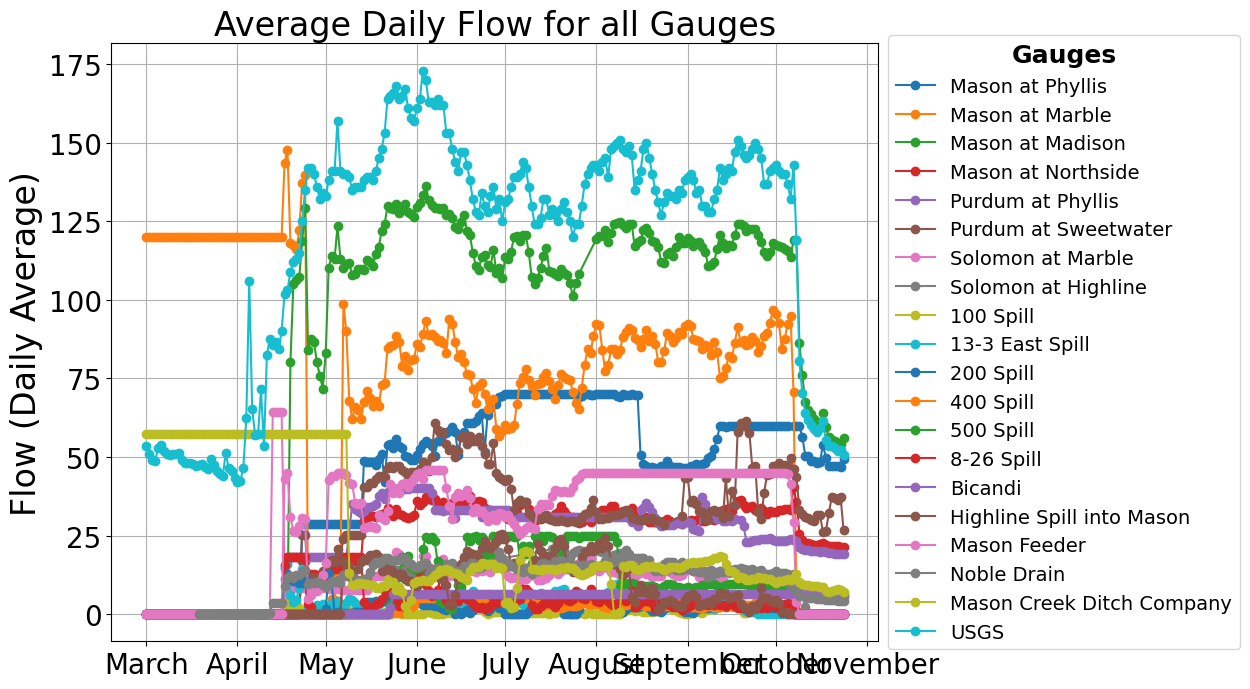

In [9]:
## ---------------------------------- ##
##  Superimposed Plot of Daily Data   ##
## ---------------------------------- ##

# Convert the Date column to datetime format
date_column_name = 'Date'
df[date_column_name] = pd.to_datetime(df[date_column_name], errors='coerce')
df['Flow'] = pd.to_numeric(df['Flow'], errors='coerce')
df.dropna(subset=[date_column_name, 'Flow'], inplace=True)

filtered_df = df[(df[date_column_name] >= start_date) & (df[date_column_name] <= end_date)]

color_palette = ['#4C934C', '#2292A4','#63264A', '#9B3D12']

plt.figure(figsize=(14, 7))

for gauge in filtered_df['Gauge'].unique():
    gauge_data = filtered_df[filtered_df['Gauge'] == gauge]
    plt.plot(gauge_data[date_column_name], gauge_data['Flow'], marker='o', label=gauge)

plt.title('Average Daily Flow for all Gauges', fontsize = 24)
plt.xlabel('')
plt.ylabel('Flow (Daily Average)', fontsize = 24)
plt.legend()
plt.grid(True)

# Set x-axis major locator to show ticks at the start of every month and format to month names
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%B'))

legend = plt.legend(title='Gauges', fontsize=14, loc='center left', bbox_to_anchor=(1, 0.5))
plt.setp(legend.get_title(), fontsize=18, fontweight='bold')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()

plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.savefig('/content/drive/MyDrive/Data/Mason Water Budget/data_output/drainflow_out/Figures/all_flow.png', dpi=300, bbox_inches='tight')
plt.show()

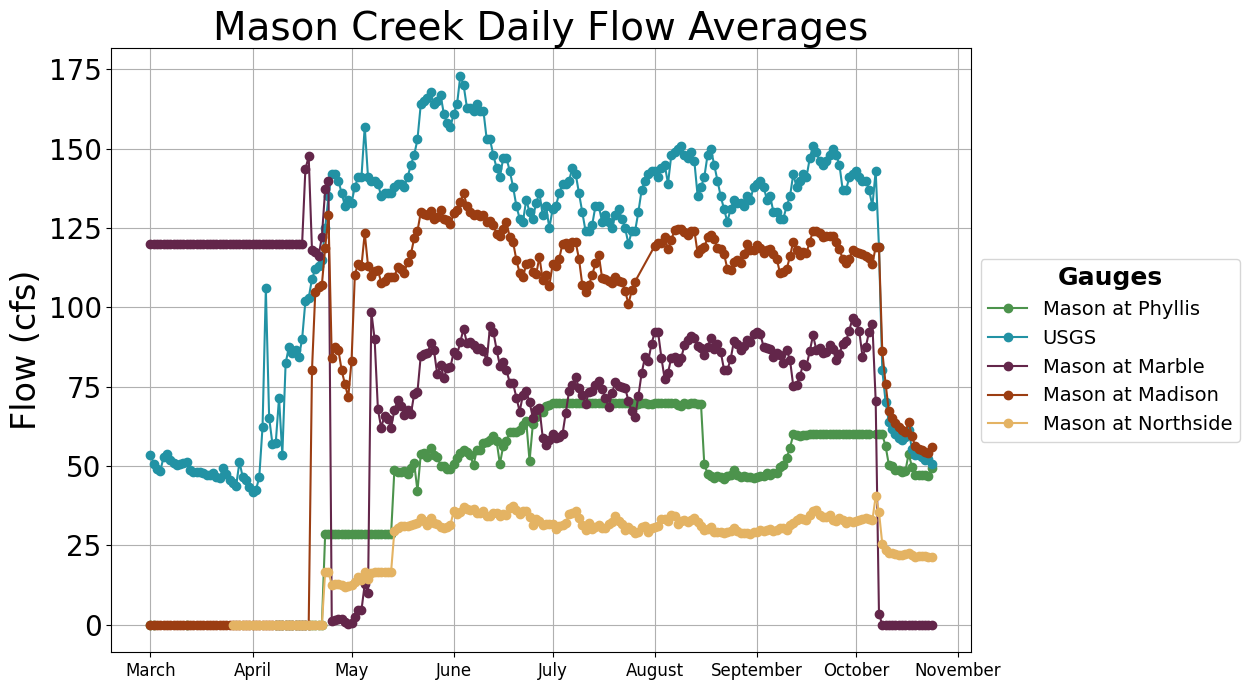

In [10]:
## ---------------------------------- ##
##  Superimposed Plot of Daily Data   ##
## ---------------------------------- ##

# MASON GAUGES ONLY

selected_gauges = ['Mason at Phyllis', 'USGS', 'Mason at Marble','Mason at Madison', 'Mason at Northside']

color_palette = ['#4C934C', '#2292A4','#63264A', '#9B3D12', '#E4B363']

# Filter the DataFrame for the selected gauges
filtered_gauge_df = filtered_df[filtered_df['Gauge'].isin(selected_gauges)]

# Plotting
plt.figure(figsize=(14, 7))

for i, gauge in enumerate(selected_gauges):
    gauge_data = filtered_gauge_df[filtered_gauge_df['Gauge'] == gauge]
    plt.plot(gauge_data[date_column_name], gauge_data['Flow'], marker='o', color=color_palette[i % len(color_palette)], label=gauge)

plt.title('Mason Creek Daily Flow Averages', fontsize=28)
plt.xlabel('')
plt.ylabel('Flow (cfs)', fontsize=24)
plt.grid(True)

# Set x-axis major locator to show ticks at the start of every month and format to month names
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%B'))

plt.xticks(fontsize=12)
plt.yticks(fontsize=20)

legend = plt.legend(title='Gauges', fontsize=14, loc='center left', bbox_to_anchor=(1, 0.5))
plt.setp(legend.get_title(), fontsize=18, fontweight='bold')

plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.savefig('/content/drive/MyDrive/Data/Mason Water Budget/data_output/drainflow_out/Figures/mason_flow.png', dpi=300, bbox_inches='tight')
plt.show()

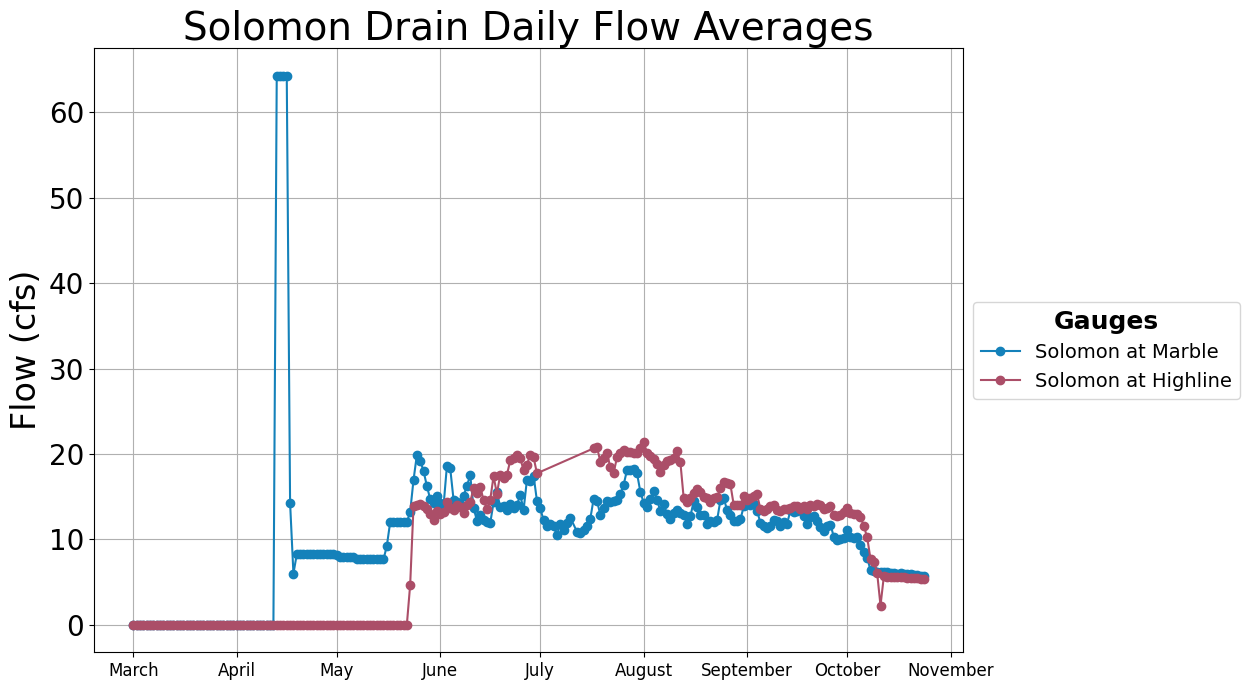

In [11]:
## ---------------------------------- ##
##  Superimposed Plot of Daily Data   ##
## ---------------------------------- ##

# SOLOMON GAUGES ONLY

selected_gauges = ['Solomon at Marble', 'Solomon at Highline']

color_palette = ['#1481BA', '#AB4E68']

# Filter the DataFrame for the selected gauges
filtered_gauge_df = filtered_df[filtered_df['Gauge'].isin(selected_gauges)]

# Plotting
plt.figure(figsize=(14, 7))

for i, gauge in enumerate(selected_gauges):
    gauge_data = filtered_gauge_df[filtered_gauge_df['Gauge'] == gauge]
    plt.plot(gauge_data[date_column_name], gauge_data['Flow'], marker='o', color=color_palette[i % len(color_palette)], label=gauge)

plt.title('Solomon Drain Daily Flow Averages', fontsize=28)
plt.xlabel('')
plt.ylabel('Flow (cfs)', fontsize=24)
plt.grid(True)

# Set x-axis major locator to show ticks at the start of every month and format to month names
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%B'))

plt.xticks( fontsize=12)
plt.yticks(fontsize=20)


legend = plt.legend(title='Gauges', fontsize=14, loc='center left', bbox_to_anchor=(1, 0.5))
plt.setp(legend.get_title(), fontsize=18, fontweight='bold')

plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.savefig('/content/drive/MyDrive/Data/Mason Water Budget/data_output/drainflow_out/Figures/solomon_flow.png', dpi=300, bbox_inches='tight')
plt.show()

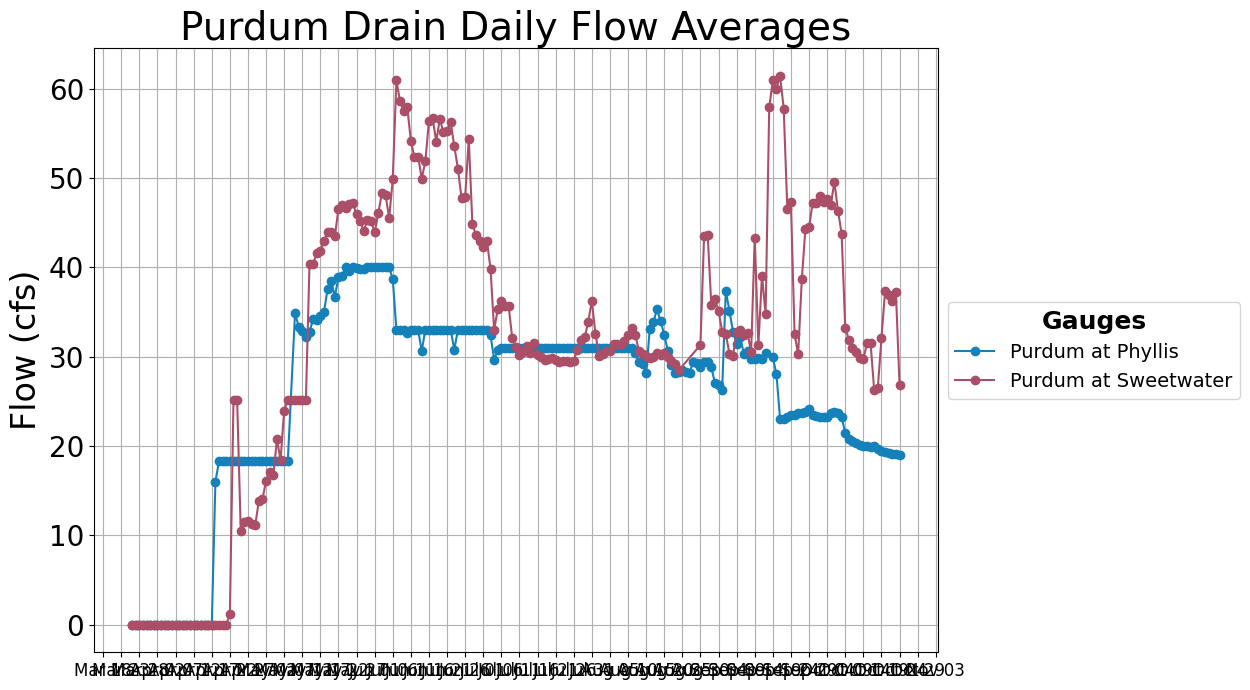

In [12]:
## ---------------------------------- ##
##  Superimposed Plot of Daily Data   ##
## ---------------------------------- ##

# PURDUM GAUGES ONLY

selected_gauges = ['Purdum at Phyllis', 'Purdum at Sweetwater']

color_palette = ['#1481BA', '#AB4E68']

# Filter the DataFrame for the selected gauges
filtered_gauge_df = filtered_df[filtered_df['Gauge'].isin(selected_gauges)]

# Plotting
plt.figure(figsize=(14, 7))

for i, gauge in enumerate(selected_gauges):
    gauge_data = filtered_gauge_df[filtered_gauge_df['Gauge'] == gauge]
    plt.plot(gauge_data[date_column_name], gauge_data['Flow'], marker='o', color=color_palette[i % len(color_palette)], label=gauge)

plt.title('Purdum Drain Daily Flow Averages', fontsize=28)
plt.xlabel('', fontsize = 1)
plt.ylabel('Flow (cfs)', fontsize=24)
plt.grid(True)

# Set x-axis major locator to show ticks at the start of every month and format to month names
#plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%B'))

# Set x-axis major locator to show ticks every five days and format to month and day
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))  # '%b %d' shows abbreviated month and day

plt.xticks(fontsize=12)
plt.yticks(fontsize=20)

legend = plt.legend(title='Gauges', fontsize=14, loc='center left', bbox_to_anchor=(1, 0.5))
plt.setp(legend.get_title(), fontsize=18, fontweight='bold')
plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.savefig('/content/drive/MyDrive/Data/Mason Water Budget/data_output/drainflow_out/Figures/purdum_flow.png', dpi=300, bbox_inches='tight')
plt.show()

## Daily Average DeltaQ

In [13]:
## --------------- ##
## IMPORT PACKAGES ##
## --------------- ##

import pandas as pd
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
# ------------------------ #
# Define Start/End Date
# ------------------------ #

# Define the timeframe for figures
start_date = '2024-03-01'
end_date = '2024-12-31'

# --------------------- #
# Import Streamflow File
# --------------------- #

df = pd.read_csv('/content/drive/MyDrive/Data/Mason Water Budget/data_input/drainflow/drainflow/final_df.csv')

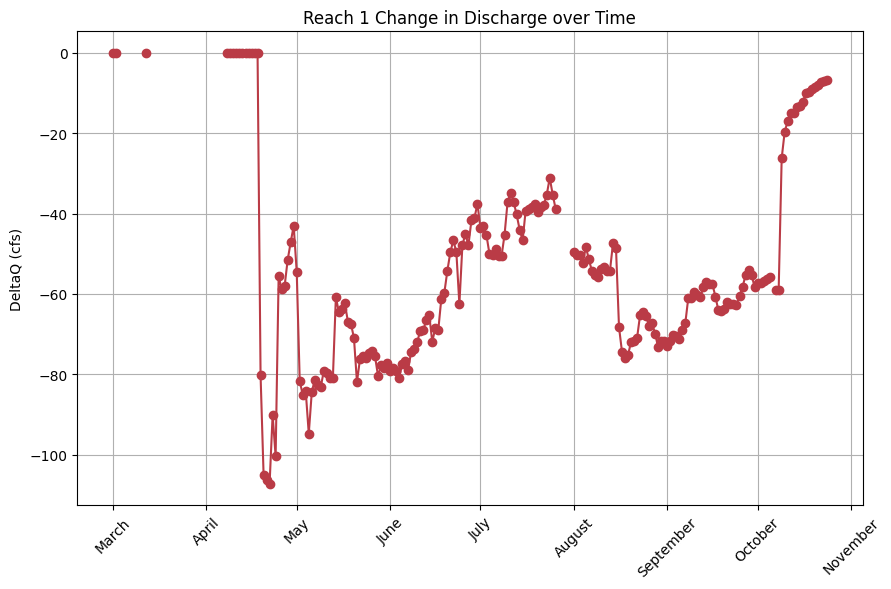

In [15]:
# ---------------- #
#       Reach 1
# ---------------- #

# Reach 1 (Mason Creek at Phyllis --> Mason Creek at Madison)

# Filter data for the gauges
reach1_qin = df[df['Gauge'] == "Mason at Phyllis"][['Date', 'Flow']].rename(columns={'Flow': 'q_in'})
reach1_qout = df[df['Gauge'] == "Mason at Madison"][['Date', 'Flow']].rename(columns={'Flow': 'q_out'})


# Merge and calculate the difference
reach1 = pd.merge(reach1_qin, reach1_qout, on='Date', how='inner')
reach1['q_diff'] = reach1['q_in'] - reach1['q_out']

# Convert 'Date' to datetime
reach1['Date'] = pd.to_datetime(reach1['Date'])

# Filter the data based on the defined timeframe
mask = (reach1['Date'] >= start_date) & (reach1['Date'] <= end_date)
reach1_filtered = reach1.loc[mask]

# Plotting q_diff over time with custom color and month names
plt.figure(figsize=(10, 6))
plt.plot(reach1_filtered['Date'], reach1_filtered['q_diff'], marker='o', linestyle='-', color='#BA3B46')  # Set line color

plt.title('Reach 1 Change in Discharge over Time')
plt.xlabel('')
plt.ylabel('DeltaQ (cfs)')
plt.grid(True)

# Set x-axis major locator and formatter to show months by name
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Set ticks to every month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%B'))  # Show full month name

plt.xticks(rotation=45)
plt.tight_layout()


plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.savefig('/content/drive/MyDrive/Data/Mason Water Budget/data_output/drainflow_out/Figures/reach1_deltaq.png', dpi=300, bbox_inches='tight')
plt.show()

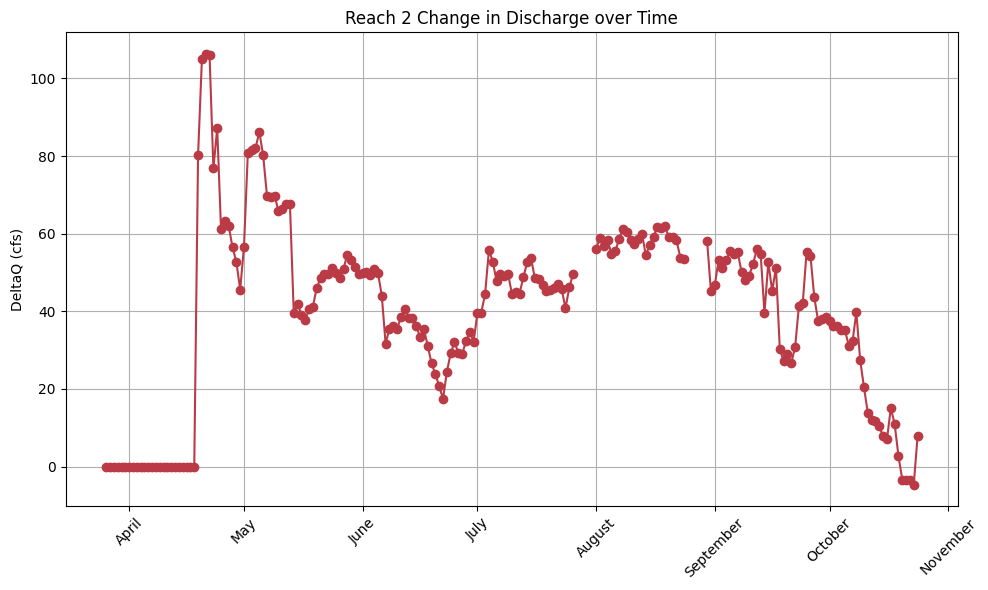

In [20]:
# ---------------- #
#       Reach 2
# ---------------- #

# Reach 2 (Mason Creek at Madison --> Mason Creek at Northside)

# Filter data for the gauges
reach2_qin = df[df['Gauge'] == "Mason at Madison"][['Date', 'Flow']].rename(columns={'Flow': 'q_in'})
purdum = df[df['Gauge'] == "Purdum at Sweetwater"][['Date', 'Flow']].rename(columns={'Flow': 'purdum_in'})
reach2_qout = df[df['Gauge'] == "Mason at Northside"][['Date', 'Flow']].rename(columns={'Flow': 'q_out'})

reach2_qin['Date'] = pd.to_datetime(reach2_qin['Date'], errors='coerce')
purdum['Date'] = pd.to_datetime(purdum['Date'], errors='coerce')
reach2_qout['Date'] = pd.to_datetime(reach2_qout['Date'], errors='coerce')

reach2 = pd.merge(reach2_qin, reach2_qout, on='Date', how='inner')
reach2 = pd.merge(reach2, purdum, on='Date', how='inner')

reach2['q_diff'] = reach2['q_in'] - reach2['q_out'] - reach2['purdum_in']

mask = (reach2['Date'] >= start_date) & (reach2['Date'] <= end_date)
reach2_filtered = reach2.loc[mask]

plt.figure(figsize=(10, 6))
plt.plot(reach2_filtered['Date'], reach2_filtered['q_diff'], marker='o', linestyle='-', color='#BA3B46')

plt.title('Reach 2 Change in Discharge over Time')
plt.xlabel('')
plt.ylabel('DeltaQ (cfs)')
plt.grid(True)

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Set ticks to every month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%B'))  # Show full month name

plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Data/Mason Water Budget/data_output/drainflow_out/Figures/reach2_deltaq.png', dpi=300, bbox_inches='tight')
plt.show()

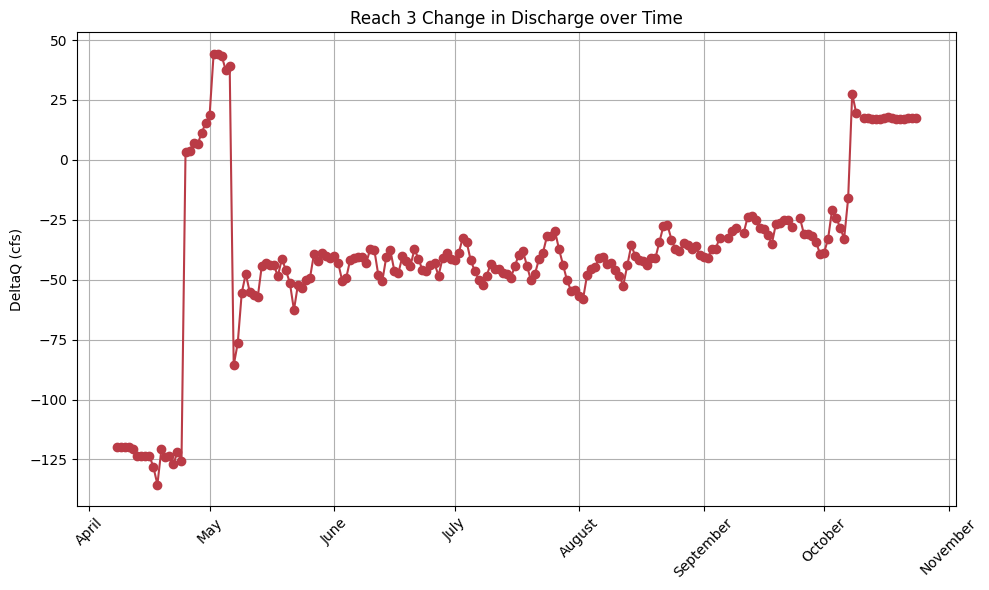

In [21]:
# ---------------- #
#       Reach 3
# ---------------- #

# Reach 3 (Mason Creek at Northside --> Mason Creek at Marble)


# Filter data for the gauges
reach3_qin = df[df['Gauge'] == "Mason at Northside"][['Date', 'Flow']].rename(columns={'Flow': 'q_in'})
reach3_qout = df[df['Gauge'] == "Mason at Marble"][['Date', 'Flow']].rename(columns={'Flow': 'q_out'})
spill_826 = df[df['Gauge'] == "8-26 Spill"][['Date', 'Flow']].rename(columns={'Flow': 'spill826_in'})
mason_feeder =  df[df['Gauge'] == "Mason Feeder"][['Date', 'Flow']].rename(columns={'Flow': 'feeder_out'})
highline_spill = df[df['Gauge'] == "Highline Spill into Mason"][['Date', 'Flow']].rename(columns={'Flow': 'highlinespill_in'})
spill_100 = df[df['Gauge'] == "100 Spill"][['Date', 'Flow']].rename(columns={'Flow': 'spill100_in'})
noble = df[df['Gauge'] == "Noble Drain"][['Date', 'Flow']].rename(columns={'Flow': 'noble_in'})


reach3_qin['Date'] = pd.to_datetime(reach3_qin['Date'], errors='coerce')
reach3_qout['Date'] = pd.to_datetime(reach3_qout['Date'], errors='coerce')
spill_826['Date'] = pd.to_datetime(spill_826['Date'], errors='coerce')
mason_feeder['Date'] = pd.to_datetime(mason_feeder['Date'], errors='coerce')
highline_spill['Date'] = pd.to_datetime(highline_spill['Date'], errors='coerce')
spill_100['Date'] = pd.to_datetime(spill_100['Date'], errors='coerce')
noble['Date'] = pd.to_datetime(noble['Date'], errors='coerce')

reach3 = pd.merge(reach3_qin, reach3_qout, on='Date', how='inner')
reach3 = pd.merge(reach3, purdum, on='Date', how='inner')
reach3 = pd.merge(reach3, spill_826, on='Date', how='inner')
reach3 = pd.merge(reach3, mason_feeder, on='Date', how='inner')
reach3 = pd.merge(reach3, highline_spill, on='Date', how='inner')
reach3 = pd.merge(reach3, spill_100, on='Date', how='inner')
reach3 = pd.merge(reach3, noble, on='Date', how='inner')

reach3['q_diff'] = reach3['q_in'] - reach3['q_out'] - reach3['spill826_in']+reach3['feeder_out']- reach3['highlinespill_in']- reach3['spill100_in']- reach3['noble_in']

mask = (reach3['Date'] >= start_date) & (reach3['Date'] <= end_date)
reach3_filtered = reach3.loc[mask]

plt.figure(figsize=(10, 6))
plt.plot(reach3_filtered['Date'], reach3_filtered['q_diff'], marker='o', linestyle='-', color='#BA3B46')

plt.title('Reach 3 Change in Discharge over Time')
plt.xlabel('')
plt.ylabel('DeltaQ (cfs)')
plt.grid(True)

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Set ticks to every month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%B'))  # Show full month name

plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Data/Mason Water Budget/data_output/drainflow_out/Figures/reach3_deltaq.png', dpi=300, bbox_inches='tight')
plt.show()

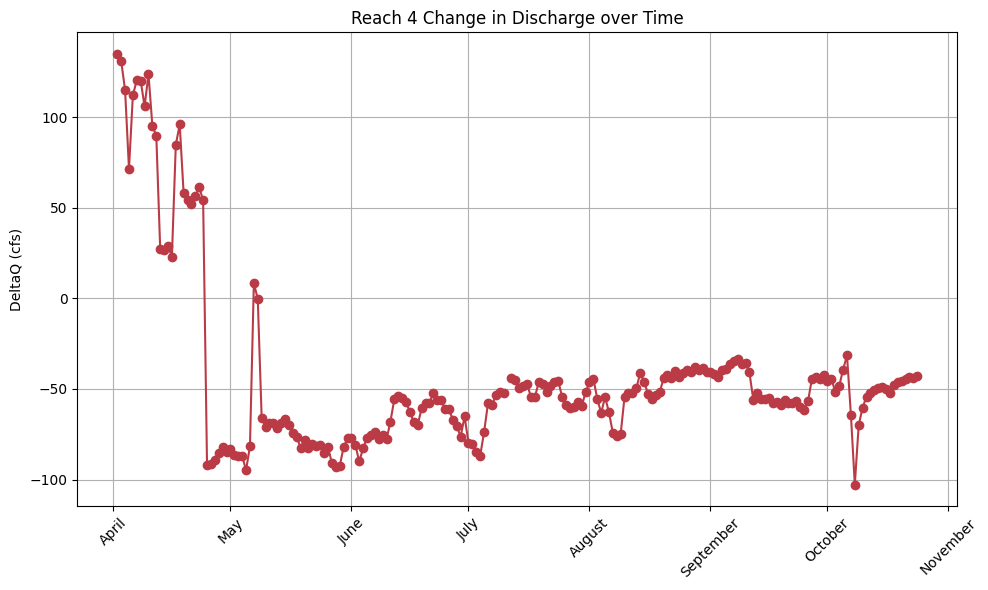

In [22]:
# ---------------- #
#       Reach 4
# ---------------- #

# Reach 4 (Mason Creek at Marble --> Mason USGS Gauge)

# Filter data for the gauges
reach4_qin = df[df['Gauge'] == "Mason at Marble"][['Date', 'Flow']].rename(columns={'Flow': 'q_in'})
reach4_qout = df[df['Gauge'] == "USGS"][['Date', 'Flow']].rename(columns={'Flow': 'q_out'})
bicandi = df[df['Gauge'] == "Bicandi"][['Date', 'Flow']].rename(columns={'Flow': 'bicandi_out'})
mcdc = df[df['Gauge'] == "Mason Creek Ditch Company"][['Date', 'Flow']].rename(columns={'Flow': 'mcdc_out'})
solomon = df[df['Gauge'] == "Solomon at Marble"][['Date', 'Flow']].rename(columns={'Flow': 'solomon_in'})
spill_400 = df[df['Gauge'] == "400 Spill"][['Date', 'Flow']].rename(columns={'Flow': 'spill400_in'})

# Convert 'Date' columns to datetime format
reach4_qin['Date'] = pd.to_datetime(reach4_qin['Date'], errors='coerce')
reach4_qout['Date'] = pd.to_datetime(reach4_qout['Date'], errors='coerce')
bicandi['Date'] = pd.to_datetime(bicandi['Date'], errors='coerce')
mcdc['Date'] = pd.to_datetime(mcdc['Date'], errors='coerce')
solomon['Date'] = pd.to_datetime(solomon['Date'], errors='coerce')
spill_400['Date'] = pd.to_datetime(spill_400['Date'], errors='coerce')

# Merge dataframes on 'Date'
reach4 = pd.merge(reach4_qin, reach4_qout, on='Date', how='inner')
reach4 = pd.merge(reach4, bicandi, on='Date', how='inner')
reach4 = pd.merge(reach4, mcdc, on='Date', how='inner')
reach4 = pd.merge(reach4, solomon, on='Date', how='inner')
reach4 = pd.merge(reach4, spill_400, on='Date', how='inner')

# Calculate the difference
reach4['q_diff'] = (reach4['q_in'] - reach4['q_out'] + reach4['bicandi_out'] +
                    reach4['mcdc_out'] - reach4['solomon_in'] - reach4['spill400_in'])

mask = (reach4['Date'] >= start_date) & (reach4['Date'] <= end_date)
reach4_filtered = reach4.loc[mask]

plt.figure(figsize=(10, 6))
plt.plot(reach4_filtered['Date'], reach4_filtered['q_diff'], marker='o', linestyle='-', color='#BA3B46')

plt.title('Reach 4 Change in Discharge over Time')
plt.xlabel('')
plt.ylabel('DeltaQ (cfs)')
plt.grid(True)

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Set ticks to every month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%B'))  # Show full month name

plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Data/Mason Water Budget/data_output/drainflow_out/Figures/reach4_deltaq.png', dpi=300, bbox_inches='tight')
plt.show()

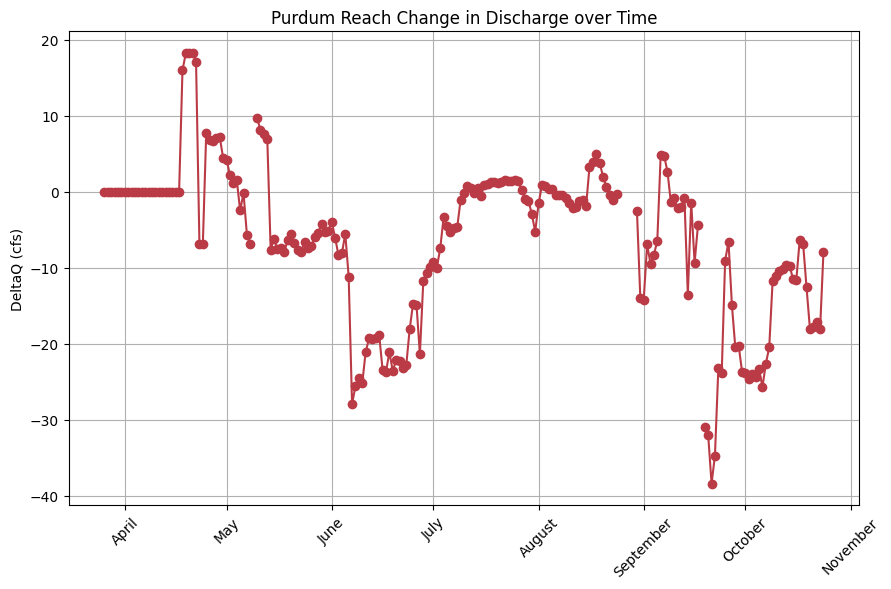

In [23]:
# ---------------- #
#   Purdum Reach
# ---------------- #

# Purdum Reach (Purdum at Phyllis --> Purdum at Sweetwater)

reachpurdum_qin = df[df['Gauge'] == "Purdum at Phyllis"][['Date', 'Flow']].rename(columns={'Flow': 'q_in'})
reachpurdum_qout = df[df['Gauge'] == "Purdum at Sweetwater"][['Date', 'Flow']].rename(columns={'Flow': 'q_out'})

# Merge and calculate the difference
reachpurdum = pd.merge(reachpurdum_qin, reachpurdum_qout, on='Date', how='inner')
reachpurdum['q_diff'] = reachpurdum['q_in'] - reachpurdum['q_out']

# Convert 'Date' to datetime
reachpurdum['Date'] = pd.to_datetime(reachpurdum['Date'])

# Filter the data based on the defined timeframe
mask = (reachpurdum['Date'] >= start_date) & (reachpurdum['Date'] <= end_date)
reachpurdum_filtered = reachpurdum.loc[mask]

# Plotting q_diff over time with custom color and month names
plt.figure(figsize=(10, 6))
plt.plot(reachpurdum_filtered['Date'], reachpurdum_filtered['q_diff'], marker='o', linestyle='-', color='#BA3B46')  # Set line color

plt.title('Purdum Reach Change in Discharge over Time')
plt.xlabel('')
plt.ylabel('DeltaQ (cfs)')
plt.grid(True)

# Set x-axis major locator and formatter to show months by name
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Set ticks to every month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%B'))  # Show full month name

plt.xticks(rotation=45)
plt.tight_layout()


plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.savefig('/content/drive/MyDrive/Data/Mason Water Budget/data_output/drainflow_out/Figures/reachpurdum_deltaq.png', dpi=300, bbox_inches='tight')
plt.show()

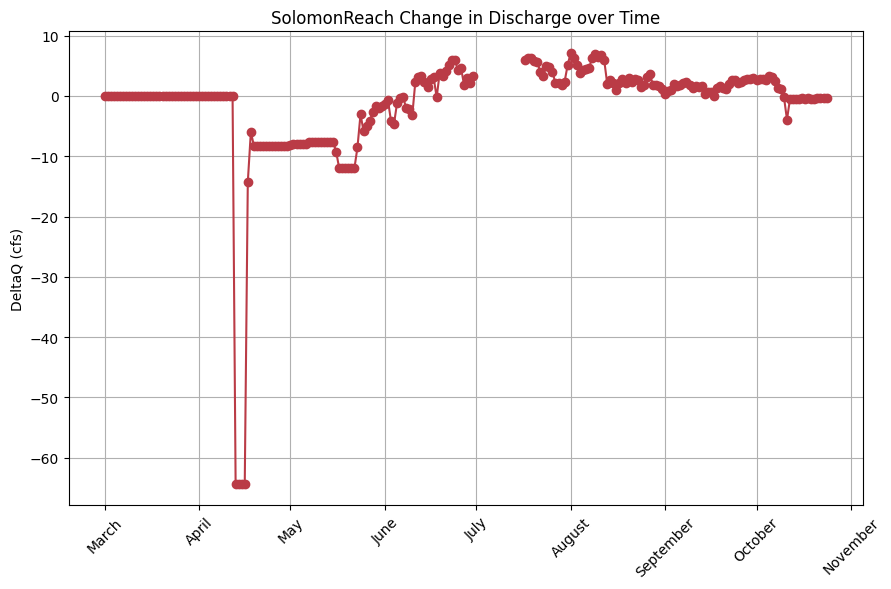

In [24]:
# ---------------- #
#   Solomon Reach
# ---------------- #

# Solomon Reach (Solomon Drain at Hiighline Canal --> Solomon Drain at Marble Front)

reachsolomon_qin = df[df['Gauge'] == "Solomon at Highline"][['Date', 'Flow']].rename(columns={'Flow': 'q_in'})
reachsolomon_qout = df[df['Gauge'] == "Solomon at Marble"][['Date', 'Flow']].rename(columns={'Flow': 'q_out'})


# Merge and calculate the difference
reachsolomon= pd.merge(reachsolomon_qin, reachsolomon_qout, on='Date', how='inner')
reachsolomon['q_diff'] = reachsolomon['q_in'] - reachsolomon['q_out']

# Convert 'Date' to datetime
reachsolomon['Date'] = pd.to_datetime(reachsolomon['Date'])

# Filter the data based on the defined timeframe
mask = (reachsolomon['Date'] >= start_date) & (reachsolomon['Date'] <= end_date)
reachsolomon_filtered = reachsolomon.loc[mask]

# Plotting q_diff over time with custom color and month names
plt.figure(figsize=(10, 6))
plt.plot(reachsolomon_filtered['Date'], reachsolomon_filtered['q_diff'], marker='o', linestyle='-', color='#BA3B46')  # Set line color

plt.title('SolomonReach Change in Discharge over Time')
plt.xlabel('')
plt.ylabel('DeltaQ (cfs)')
plt.grid(True)

# Set x-axis major locator and formatter to show months by name
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Set ticks to every month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%B'))  # Show full month name

plt.xticks(rotation=45)
plt.tight_layout()


plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.savefig('/content/drive/MyDrive/Data/Mason Water Budget/data_output/drainflow_out/Figures/reachsolomon_deltaq.png', dpi=300, bbox_inches='tight')
plt.show()

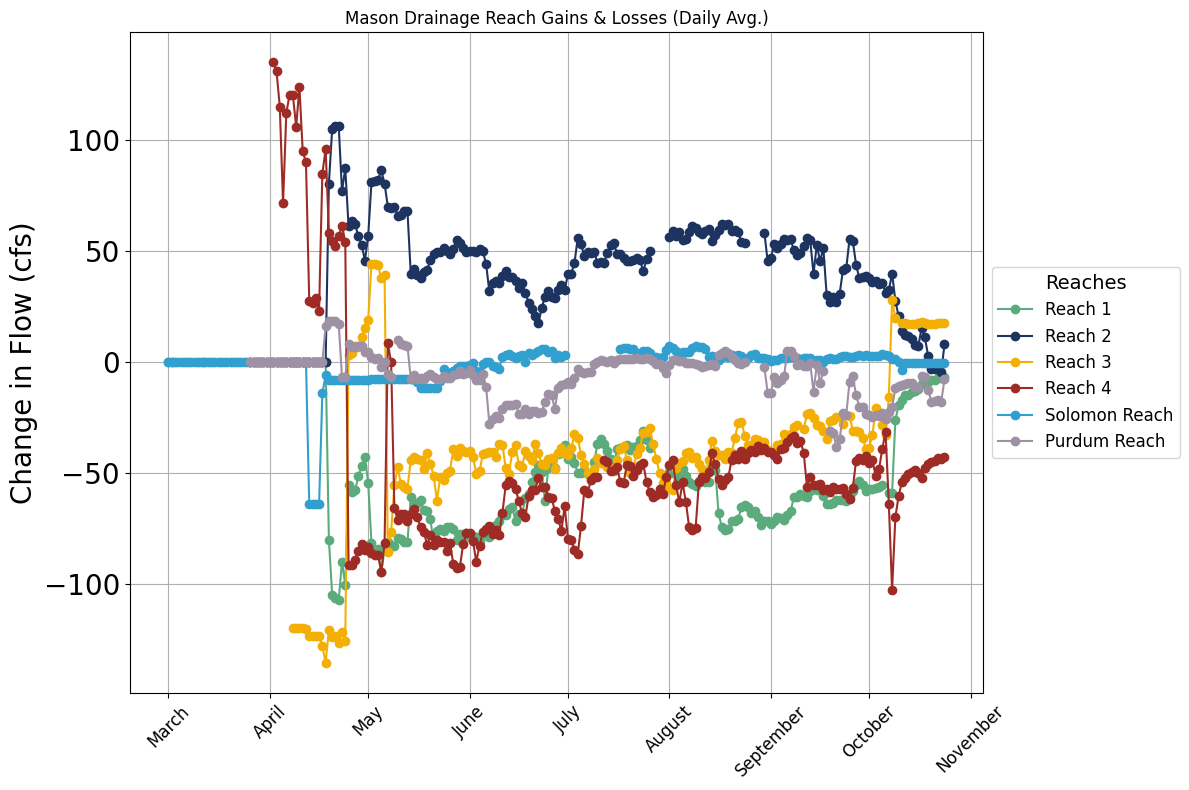

In [38]:
# -------------------- #
#   PLOT - DALY AVG
# -------------------- #

plt.figure(figsize=(12, 8))
plt.plot(reach1_filtered['Date'], reach1_filtered['q_diff'], marker='o', linestyle='-', color='#5CAB7D', label='Reach 1')
plt.plot(reach2_filtered['Date'], reach2_filtered['q_diff'], marker='o', linestyle='-', color='#1D3461', label='Reach 2')
plt.plot(reach3_filtered['Date'], reach3_filtered['q_diff'], marker='o', linestyle='-', color='#F3AF04', label='Reach 3')
plt.plot(reach4_filtered['Date'], reach4_filtered['q_diff'], marker='o', linestyle='-', color='#9E2B25', label='Reach 4')
plt.plot(reachsolomon_filtered['Date'], reachsolomon_filtered['q_diff'], marker='o', linestyle='-', color='#32A0CF', label='Solomon Reach')
plt.plot(reachpurdum_filtered['Date'], reachpurdum_filtered['q_diff'], marker='o', linestyle='-', color='#9D91A3', label='Purdum Reach')

plt.title('Mason Drainage Reach Gains & Losses (Daily Avg.)')
plt.xlabel('')
plt.ylabel('Change in Flow (cfs)', fontsize =20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=20)

plt.grid(True)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Set ticks to every month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%B'))  # Show full month name

plt.xticks(rotation=45)

plt.legend(title='Reaches', fontsize=12, loc='center left', bbox_to_anchor=(1, 0.5), title_fontsize=14)

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Data/Mason Water Budget/data_output/drainflow_out/Figures/allreaches_daily_deltaq.png', dpi=300, bbox_inches='tight')
plt.show()

## Monthly Sum DeltaQ

In [ ]:
# Sum Monthly Delta Q for each Reach

# ---------- #
#   Reach 1
# ---------- #
reach1_qin = df[df['Gauge'] == "Mason at Phyllis"][['Date', 'Flow']].rename(columns={'Flow': 'q_in'})
reach1_qout = df[df['Gauge'] == "Mason at Madison"][['Date', 'Flow']].rename(columns={'Flow': 'q_out'})
reach1_qin['Date'] = pd.to_datetime(reach1_qin['Date'], errors='coerce')
reach1_qout['Date'] = pd.to_datetime(reach1_qout['Date'], errors='coerce')
reach1_qin_monthly_sum = reach1_qin.resample('M', on='Date').sum()
reach1_qout_monthly_sum = reach1_qout.resample('M', on='Date').sum()
reach1_monthly_diff = reach1_qin_monthly_sum['q_in'] - reach1_qout_monthly_sum['q_out']

# ---------- #
#   Reach 2
# ---------- #
reach2_qin = df[df['Gauge'] == "Mason at Madison"][['Date', 'Flow']].rename(columns={'Flow': 'q_in'})
purdum = df[df['Gauge'] == "Purdum at Sweetwater"][['Date', 'Flow']].rename(columns={'Flow': 'purdum_in'})
reach2_qout = df[df['Gauge'] == "Mason at Northside"][['Date', 'Flow']].rename(columns={'Flow': 'q_out'})
reach2_qin['Date'] = pd.to_datetime(reach2_qin['Date'], errors='coerce')
purdum['Date'] = pd.to_datetime(purdum['Date'], errors='coerce')
reach2_qout['Date'] = pd.to_datetime(reach2_qout['Date'], errors='coerce')
reach2_qin_monthly_sum = reach2_qin.resample('M', on='Date').sum()
purdum_monthly_sum = purdum.resample('M', on='Date').sum()
reach2_qout_monthly_sum = reach2_qout.resample('M', on='Date').sum()
reach2_monthly_diff = reach2_qin_monthly_sum['q_in'] - reach2_qout_monthly_sum['q_out'] - purdum_monthly_sum['purdum_in']

# ---------- #
#   Reach 3
# ---------- #
reach3_qin = df[df['Gauge'] == "Mason at Northside"][['Date', 'Flow']].rename(columns={'Flow': 'q_in'})
reach3_qout = df[df['Gauge'] == "Mason at Marble"][['Date', 'Flow']].rename(columns={'Flow': 'q_out'})
spill_826 = df[df['Gauge'] == "8-26 Spill"][['Date', 'Flow']].rename(columns={'Flow': 'spill826_in'})
mason_feeder = df[df['Gauge'] == "Mason Feeder"][['Date', 'Flow']].rename(columns={'Flow': 'feeder_out'})
highline_spill = df[df['Gauge'] == "Highline Spill into Mason"][['Date', 'Flow']].rename(columns={'Flow': 'highlinespill_in'})
spill_100 = df[df['Gauge'] == "100 Spill"][['Date', 'Flow']].rename(columns={'Flow': 'spill100_in'})
noble = df[df['Gauge'] == "Noble Drain"][['Date', 'Flow']].rename(columns={'Flow': 'noble_in'})

reach3_qin['Date'] = pd.to_datetime(reach3_qin['Date'], errors='coerce')
reach3_qout['Date'] = pd.to_datetime(reach3_qout['Date'], errors='coerce')
spill_826['Date'] = pd.to_datetime(spill_826['Date'], errors='coerce')
mason_feeder['Date'] = pd.to_datetime(mason_feeder['Date'], errors='coerce')
highline_spill['Date'] = pd.to_datetime(highline_spill['Date'], errors='coerce')
spill_100['Date'] = pd.to_datetime(spill_100['Date'], errors='coerce')
noble['Date'] = pd.to_datetime(noble['Date'], errors='coerce')

reach3_qin_monthly_sum = reach3_qin.resample('M', on='Date').sum()
reach3_qout_monthly_sum = reach3_qout.resample('M', on='Date').sum()
spill_826_monthly_sum = spill_826.resample('M', on='Date').sum()
mason_feeder_monthly_sum = mason_feeder.resample('M', on='Date').sum()
highline_spill_monthly_sum = highline_spill.resample('M', on='Date').sum()
spill_100_monthly_sum = spill_100.resample('M', on='Date').sum()
noble_monthly_sum = noble.resample('M', on='Date').sum()

reach3_monthly_diff = (
    reach3_qin_monthly_sum['q_in'] -
    reach3_qout_monthly_sum['q_out'] -
    spill_826_monthly_sum['spill826_in'] +
    mason_feeder_monthly_sum['feeder_out'] -
    highline_spill_monthly_sum['highlinespill_in'] -
    spill_100_monthly_sum['spill100_in'] -
    noble_monthly_sum['noble_in'])


# ---------- #
#   Reach 4
# ---------- #

reach4_qin = df[df['Gauge'] == "Mason at Marble"][['Date', 'Flow']].rename(columns={'Flow': 'q_in'})
reach4_qout = df[df['Gauge'] == "USGS"][['Date', 'Flow']].rename(columns={'Flow': 'q_out'})
bicandi = df[df['Gauge'] == "Bicandi"][['Date', 'Flow']].rename(columns={'Flow': 'bicandi_out'})
mcdc = df[df['Gauge'] == "Mason Creek Ditch Company"][['Date', 'Flow']].rename(columns={'Flow': 'mcdc_out'})
solomon = df[df['Gauge'] == "Solomon at Marble"][['Date', 'Flow']].rename(columns={'Flow': 'solomon_in'})
spill_400 = df[df['Gauge'] == "400 Spill"][['Date', 'Flow']].rename(columns={'Flow': 'spill400_in'})

reach4_qin['Date'] = pd.to_datetime(reach4_qin['Date'], errors='coerce')
reach4_qout['Date'] = pd.to_datetime(reach4_qout['Date'], errors='coerce')
bicandi['Date'] = pd.to_datetime(bicandi['Date'], errors='coerce')
mcdc['Date'] = pd.to_datetime(mcdc['Date'], errors='coerce')
solomon['Date'] = pd.to_datetime(solomon['Date'], errors='coerce')
spill_400['Date'] = pd.to_datetime(spill_400['Date'], errors='coerce')

reach4_qin_monthly_sum = reach4_qin.resample('M', on='Date').sum()
reach4_qout_monthly_sum = reach4_qout.resample('M', on='Date').sum()
bicandi_monthly_sum = bicandi.resample('M', on='Date').sum()
mcdc_monthly_sum = mcdc.resample('M', on='Date').sum()
solomon_monthly_sum = solomon.resample('M', on='Date').sum()
spill_400_monthly_sum = spill_400.resample('M', on='Date').sum()

reach4_monthly_diff = (
    reach4_qin_monthly_sum['q_in'] -
    reach4_qout_monthly_sum['q_out'] +
    bicandi_monthly_sum['bicandi_out'] +
    mcdc_monthly_sum['mcdc_out'] -
    solomon_monthly_sum['solomon_in'] -
    spill_400_monthly_sum['spill400_in'])

# -------------- #
#  Purdum Reach
# -------------- #

reachpurdum_qin = df[df['Gauge'] == "Purdum at Phyllis"][['Date', 'Flow']].rename(columns={'Flow': 'q_in'})
reachpurdum_qout = df[df['Gauge'] == "Purdum at Sweetwater"][['Date', 'Flow']].rename(columns={'Flow': 'q_out'})
reachpurdum_qin['Date'] = pd.to_datetime(reachpurdum_qin['Date'], errors='coerce')
reachpurdum_qout['Date'] = pd.to_datetime(reachpurdum_qout['Date'], errors='coerce')
reachpurdum_qin_monthly_sum = reachpurdum_qin.resample('M', on='Date').sum()
reachpurdum_qout_monthly_sum = reachpurdum_qout.resample('M', on='Date').sum()
reachpurdum_monthly_diff = reachpurdum_qin_monthly_sum['q_in'] - reachpurdum_qout_monthly_sum['q_out']

# ---------------- #
#  Solomon Reach
# ---------------- #
reachsolomon_qin = df[df['Gauge'] == "Solomon at Highline"][['Date', 'Flow']].rename(columns={'Flow': 'q_in'})
reachsolomon_qout = df[df['Gauge'] == "Solomon at Marble"][['Date', 'Flow']].rename(columns={'Flow': 'q_out'})
reachsolomon_qin['Date'] = pd.to_datetime(reachsolomon_qin['Date'], errors='coerce')
reachsolomon_qout['Date'] = pd.to_datetime(reachsolomon_qout['Date'], errors='coerce')
reachsolomon_qin_monthly_sum = reachsolomon_qin.resample('M', on='Date').sum()
reachsolomon_qout_monthly_sum = reachsolomon_qout.resample('M', on='Date').sum()
reachsolomon_monthly_diff = reachsolomon_qin_monthly_sum['q_in'] - reachsolomon_qout_monthly_sum['q_out']


<ipython-input-5-403de4ee8103>:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  reach1_qin_monthly_sum = reach1_qin.resample('M', on='Date').sum()
<ipython-input-5-403de4ee8103>:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  reach1_qout_monthly_sum = reach1_qout.resample('M', on='Date').sum()
<ipython-input-5-403de4ee8103>:23: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  reach2_qin_monthly_sum = reach2_qin.resample('M', on='Date').sum()
<ipython-input-5-403de4ee8103>:24: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  purdum_monthly_sum = purdum.resample('M', on='Date').sum()
<ipython-input-5-403de4ee8103>:25: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  reach2_qout_monthly_sum = reach2_qout.resample('M', on='Da

In [ ]:
# -------------- #
#  Compile Data
# -------------- #

# Create individual dataframes for each reach and add the Reach identifier
reach1_df = reach1_monthly_diff.reset_index().rename(columns={0: 'dQ'})
reach1_df['Reach'] = 'Reach 1'
reach2_df = reach2_monthly_diff.reset_index().rename(columns={0: 'dQ'})
reach2_df['Reach'] = 'Reach 2'
reach3_df = reach3_monthly_diff.reset_index().rename(columns={0: 'dQ'})
reach3_df['Reach'] = 'Reach 3'
reach4_df = reach4_monthly_diff.reset_index().rename(columns={0: 'dQ'})
reach4_df['Reach'] = 'Reach 4'
reach_purdum_df = reachpurdum_monthly_diff.reset_index().rename(columns={0: 'dQ'})
reach_purdum_df['Reach'] = 'Purdum Reach'
reach_solomon_df = reachsolomon_monthly_diff.reset_index().rename(columns={0: 'dQ'})
reach_solomon_df['Reach'] = 'Solomon Reach'

# Combine all the reach dataframes into a single dataset
final_df = pd.concat([reach1_df, reach2_df, reach3_df, reach4_df, reach_purdum_df, reach_solomon_df], ignore_index=True)

# Rename columns and format Month as just year-month if needed
final_df = final_df.rename(columns={'Date': 'Month'}).sort_values(by=['Reach', 'Month'])

# Display the final DataFrame
final_df[['Reach', 'Month', 'dQ']]

final_df.to_csv('/content/drive/MyDrive/Data/Mason Water Budget/data_output/drainflow_out/drainflow_final.csv')

In [ ]:
# Create individual DataFrames for each reach and add the Reach identifier
reach1_df = reach1_monthly_diff.reset_index().rename(columns={0: 'dQ', 'Date': 'Month'})
reach1_df['Reach'] = 'Reach 1'
reach2_df = reach2_monthly_diff.reset_index().rename(columns={0: 'dQ', 'Date': 'Month'})
reach2_df['Reach'] = 'Reach 2'
reach3_df = reach3_monthly_diff.reset_index().rename(columns={0: 'dQ', 'Date': 'Month'})
reach3_df['Reach'] = 'Reach 3'
reach4_df = reach4_monthly_diff.reset_index().rename(columns={0: 'dQ', 'Date': 'Month'})
reach4_df['Reach'] = 'Reach 4'
reach_purdum_df = reachpurdum_monthly_diff.reset_index().rename(columns={0: 'dQ', 'Date': 'Month'})
reach_purdum_df['Reach'] = 'Purdum Reach'
reach_solomon_df = reachsolomon_monthly_diff.reset_index().rename(columns={0: 'dQ', 'Date': 'Month'})
reach_solomon_df['Reach'] = 'Solomon Reach'

# Combine all the reach DataFrames into a single dataset
final_df = pd.concat([reach1_df, reach2_df, reach3_df, reach4_df, reach_purdum_df, reach_solomon_df], ignore_index=True)

# Extract numerical month and aggregate by Reach and Month
final_df['Month'] = final_df['Month'].dt.month  # Extract month as numerical value
final_df = final_df.groupby(['Reach', 'Month'], as_index=False)['dQ'].mean()  # Use mean, sum, or other aggregate as needed

# Sort by Reach and Month
final_df = final_df.sort_values(by=['Reach', 'Month']).reset_index(drop=True)

# Display the final DataFrame
final_df

# Save to CSV
final_df.to_csv('/content/drive/MyDrive/Data/Mason Water Budget/data_output/drainflow_out/drainflow_final.csv', index=False)

In [ ]:
final_df

,Reach,Month,dQ
0,Purdum Reach,3,0.000000
1,Purdum Reach,4,114.126319
2,Purdum Reach,5,-116.763053
3,Purdum Reach,6,-527.778998
4,Purdum Reach,7,-44.887250
...,...,...,...
63,Solomon Reach,8,109.905652
64,Solomon Reach,9,49.376109
65,Solomon Reach,10,6.095077
66,Solomon Reach,11,0.000000


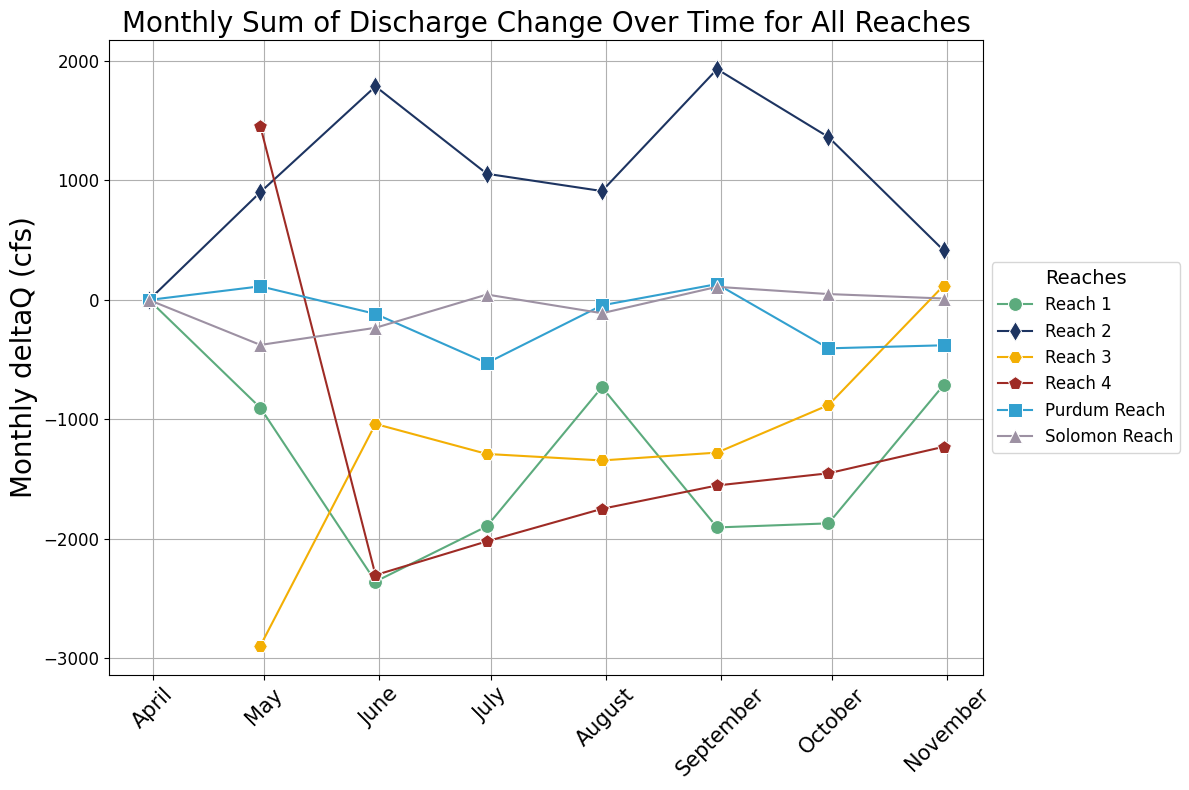

In [ ]:
# -------------------- #
#   PLOT - MONTHLY SUM
# -------------------- #
plt.figure(figsize=(12, 8))

# Reach 1
sns.lineplot(data=reach1_monthly_diff.loc[start_date:end_date], marker='o', linestyle='-', color='#5CAB7D', label='Reach 1', markersize=10)

# Reach 2
sns.lineplot(data=reach2_monthly_diff.loc[start_date:end_date], marker='d', linestyle='-', color='#1D3461', label='Reach 2', markersize=10)

# Reach 3
sns.lineplot(data=reach3_monthly_diff.loc[start_date:end_date], marker='H', linestyle='-', color='#F3AF04', label='Reach 3', markersize=10)

# Reach 4
sns.lineplot(data=reach4_monthly_diff.loc[start_date:end_date], marker='p', linestyle='-', color='#9E2B25', label='Reach 4', markersize=10)

# Purdum Reach
sns.lineplot(data=reachpurdum_monthly_diff.loc[start_date:end_date], marker='s', linestyle='-', color='#32A0CF', label='Purdum Reach', markersize=10)

# Solomon Reach
sns.lineplot(data=reachsolomon_monthly_diff.loc[start_date:end_date], marker='^', linestyle='-', color='#9D91A3', label='Solomon Reach', markersize=10)

# Customizing the plot
plt.title('Monthly Sum of Discharge Change Over Time for All Reaches', fontsize=20)
plt.xlabel('', fontsize=20)
plt.ylabel('Monthly deltaQ (cfs)', fontsize=20)
plt.grid(True)

# Date formatting
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Set ticks to every month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%B'))  # Show full month name

plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=12)
# Place legend outside the plot on the right
plt.legend(title='Reaches', fontsize=12, loc='center left', bbox_to_anchor=(1, 0.5), title_fontsize=14)

plt.tight_layout()
# Saving the figure
plt.savefig('/content/drive/MyDrive/Data/Mason Water Budget/data_output/drainflow_out/Figures/monthly_deltaq.png', dpi=300, bbox_inches='tight')
plt.show()